# <font style = "color:rgb(50,120,229)">Ensemble Techniques Project</font>

## <font style = "color:rgb(50,120,229)">Data Description</font>

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## <font style = "color:rgb(50,120,229)">Domain</font>

Banking

## <font style = "color:rgb(50,120,229)">Context</font>

Leveraging customer information is paramount for most businesses. In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.

## <font style = "color:rgb(50,120,229)">Attribute Information</font>

1. `age` (numeric)
2. `job` : type of job (categorical: 'admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')
3. `marital` : marital status (categorical: 'divorced','married','single','unknown';
note: 'divorced' means divorced or widowed)
4. `education` (categorical:
'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','univers
ity.degree','unknown')
5. `default`: has credit in default? (categorical: 'no','yes','unknown')
6. `balance`: average yearly balance, in euros (numeric)
7. `housing`: has housing loan? (categorical: 'no','yes','unknown')
8. `loan`: has personal loan? (categorical: 'no','yes','unknown')
9. `contact`: contact communication type (categorical: 'cellular','telephone')
10. `day`: last contact day of the month (numeric 1 -31)
11. `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
12. `duration`: last contact duration, in seconds (numeric). Important note: this
attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet,
the duration is not known before a call is performed. Also, after the end of the
call y is obviously known. Thus, this input should only be included for benchmark
purposes and should be discarded if the intention is to have a realistic predictive
model.
13. `campaign`: number of contacts performed during this campaign and for this
client (numeric, includes last contact)
14. `pdays`: number of days that passed by after the client was last contacted from a
previous campaign (numeric; 999 means client was not previously contacted)
15. `previous`: number of contacts performed before this campaign and for this client
(numeric)
16. `poutcome`: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')
17. `target`: has the client subscribed a term deposit? (binary: "yes","no")

## <font style = "color:rgb(50,120,229)">Learning Outcomes</font>

- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using an Ensemble Model
- Tuning an Ensemble model

## <font style = "color:rgb(50,120,229)">Objective</font>

The classification goal is to predict if the client will subscribe (yes/no) a term deposit
(variable y).

### <font style = "color:rgb(8,133,37)">Step 1: Import the necessary libraries</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

### <font style = "color:rgb(8,133,37)">Read the data as a data frame</font>

In [3]:
!ls

 bank-full.csv			    'Problem statement- ensemble project.pdf'
 Ensemble-Techniques-Project.ipynb


In [4]:
bank = pd.read_csv("bank-full.csv")

In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### <font style = "color:rgb(8,133,37)">Perform basic EDA which should include the following and print out your insights at every step</font>

#### <font style = "color:rgb(8,133,37)">Shape of the data</font>

In [6]:
print("Shape of the dataframe: {}".format(bank.shape))

Shape of the dataframe: (45211, 17)


The dataframe has 45211 samples and 17 features for each sample.

#### <font style = "color:rgb(8,133,37)">Data type of each attribute</font>

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Note that there are some categorical variables like `job`, `marital`, etc. that are currently in `object` format that need to be mapped to 0 and 1 or using one hot embedding.

#### <font style = "color:rgb(8,133,37)">Checking the presence of missing values</font>

In [8]:
# Print the percentage of missing values
bank.isna().sum()/len(bank.index) * 100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
Target       0.0
dtype: float64

Note that there is no missing value in any of the rows. But, as we can see from the attribute information above, there are values like "unknown", "other", etc. which serve as missing values.

Let's start off by printing the unique values for each categorical attribute.

In [9]:
bank.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

There are 281 rows with unknown jobs. Let's remove such rows.

In [10]:
bank.drop(bank[bank.job=="unknown"].index,axis=0,inplace=True)

In [11]:
bank.marital.value_counts()

married     27011
single      12722
divorced     5190
Name: marital, dtype: int64

In [12]:
bank.education.value_counts()

secondary    23131
tertiary     13262
primary       6800
unknown       1730
Name: education, dtype: int64

There are 1822 rows with missing education data. Let's remove these rows.

In [13]:
bank.drop(bank[bank.education=="unknown"].index,axis=0,inplace=True)

In [14]:
bank.default.value_counts()

no     42411
yes      782
Name: default, dtype: int64

In [15]:
bank.contact.value_counts()

cellular     28213
unknown      12286
telephone     2694
Name: contact, dtype: int64

Note the high number of unknown entries in `contact`. It's better to drop the entire column.

In [16]:
bank.drop("contact",axis=1,inplace=True)

In [17]:
bank.month.value_counts()

may    13192
jul     6601
aug     6037
jun     4980
nov     3842
apr     2820
feb     2533
jan     1318
oct      690
sep      532
mar      448
dec      200
Name: month, dtype: int64

In [18]:
bank.poutcome.value_counts()

unknown    35286
failure     4709
other       1774
success     1424
Name: poutcome, dtype: int64

Again, note the high number of unkown entries in `poutcome` attribute. It's better to drop the entire column.

In [19]:
bank.drop("poutcome",axis=1,inplace=True)

#### <font style = "color:rgb(8,133,37)">5 Point summary of numerical attributes</font>

In [20]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000,43193.000000
mean,40.764082,1354.027342,15.809414,258.323409,2.758178,40.404070,0.584863
std,10.512640,3042.103625,8.305970,258.162006,3.063987,100.420624,2.332672
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,442.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1412.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,58.000000,871.000000,275.000000


Let's start off by noting the presence of outliers in numerical attributes.

1. `balance` column has a minimum value of -8019 which is negative, but the average annual balance should not be negative. This either can be a typo or an outlier.
2. There is a significant difference in 75% and max values of `age` attribute.
3. Similarly, there are outliers in `duration`, `campaign`.
4. Note that `previous` and `pdays` have majority of entries with -1 or 0 (missing data or client not contacted), we can drop this column.

#### <font style = "color:rgb(8,133,37)">Checking the presence of outliers</font>

I will use box plot to check the presence of outliers.

**Age**

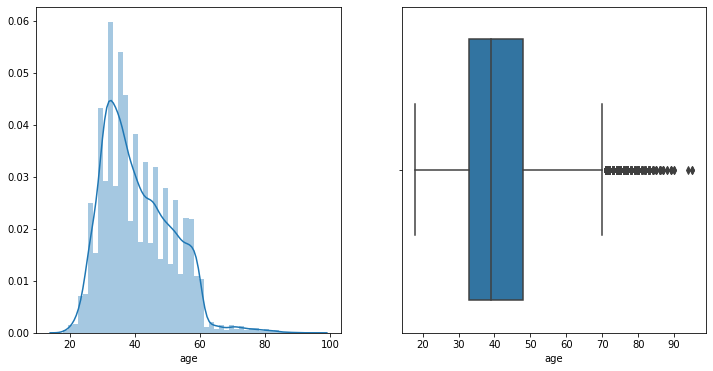

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(bank["age"])
plt.subplot(1,2,2)
sns.boxplot(bank["age"])
plt.show()

In [22]:
bank.age.max()

95

In [23]:
bank.age.min()

18

While there are outliers in this attribute, but both max and min ages (95,18) are realistic, and thus, we won't remove them.

**Balance**

We can use zscore as a standard for outlier removal. Any value which lies 3$\sigma$ away from the mean can be considered an outlier and dropped.

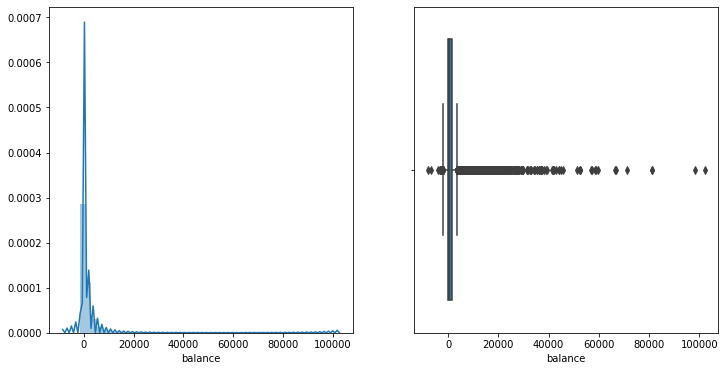

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(bank["balance"])
plt.subplot(1,2,2)
sns.boxplot(bank["balance"])
plt.show()

In [25]:
from scipy.stats import zscore
print("Current mean: {}".format(bank.balance.mean()))

Current mean: 1354.0273423934434


In [26]:
bank["balance_outliers"] = zscore(bank["balance"])

In [27]:
bank.drop(bank[(bank["balance_outliers"]>3) | (bank["balance_outliers"] < -3)].index,axis=0,inplace=True)

In [28]:
bank.shape

(42484, 16)

In [29]:
print("Rows dropped: {}".format(45211-44466))

Rows dropped: 745


In [30]:
# We don't need the zscore column anymore
bank.drop("balance_outliers",axis=1,inplace=True)

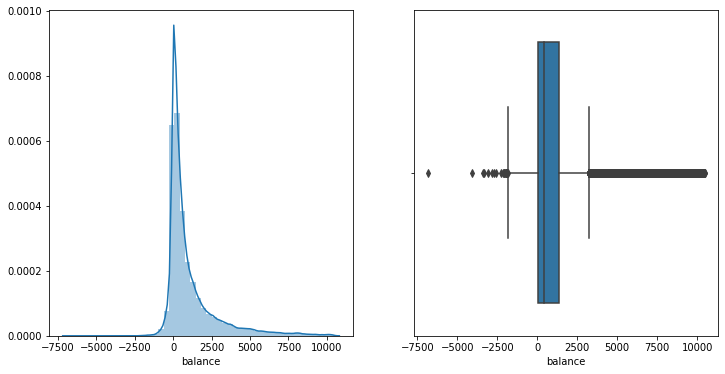

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(bank["balance"])
plt.subplot(1,2,2)
sns.boxplot(bank["balance"])
plt.show()

We can clearly see a few more outliers to the negative side. Let's drop them.

In [32]:
sum(bank.balance<-2500)

8

In [33]:
bank.drop(bank[bank.balance<-2500].index,axis=0,inplace=True)

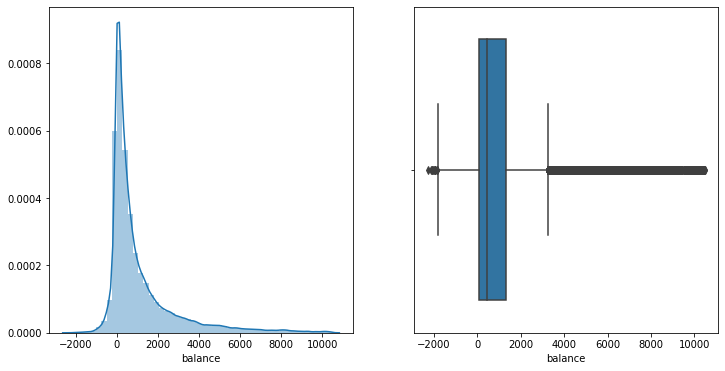

In [34]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(bank["balance"])
plt.subplot(1,2,2)
sns.boxplot(bank["balance"])
plt.show()

**Day**

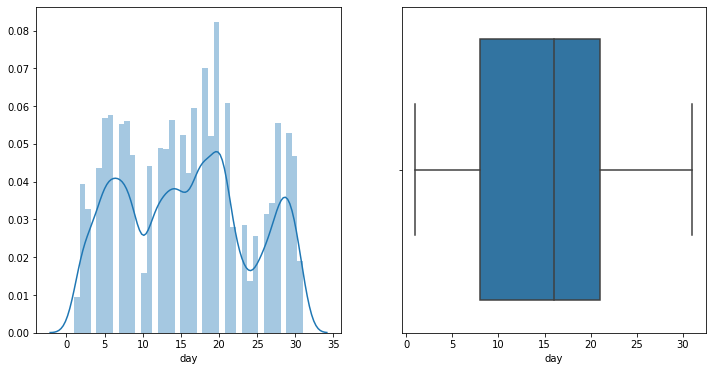

In [35]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(bank["day"])
plt.subplot(1,2,2)
sns.boxplot(bank["day"])
plt.show()

The `day` attribute does not have any outliers.

**Duration**

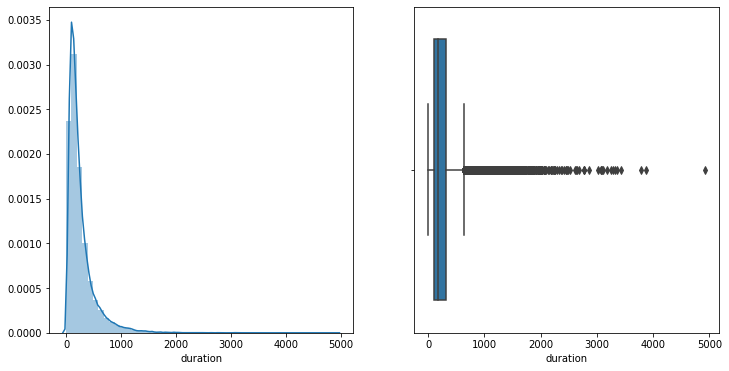

In [36]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(bank["duration"])
plt.subplot(1,2,2)
sns.boxplot(bank["duration"])
plt.show()

We know that `duration` is not known in advance and by the end of the call, when we know the duration, we also know the result. So, we can drop this attribute. That's why, we are not concerned about the outlier presence in `duration` attribute.

In [37]:
bank.drop("duration",axis=1,inplace=True)

**Pdays**

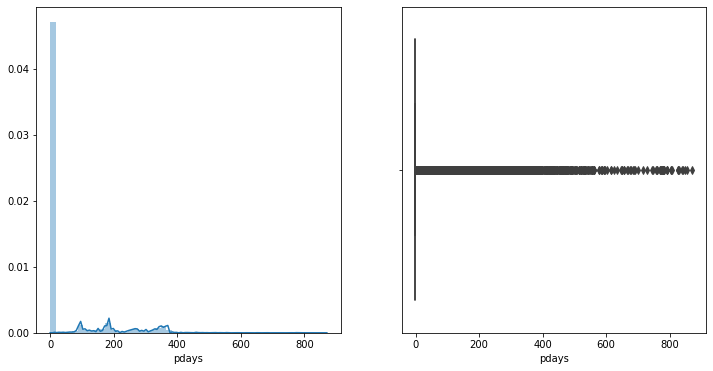

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(bank["pdays"])
plt.subplot(1,2,2)
sns.boxplot(bank["pdays"])
plt.show()

Because of the unbalanced distribution in value ranges for `pdays` attribute, it's better to convert it to categorical variable by binning the values.

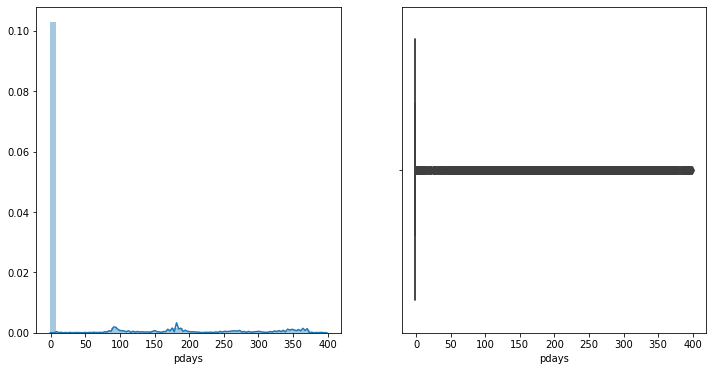

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(bank[bank["pdays"]<400].pdays)
plt.subplot(1,2,2)
sns.boxplot(bank[bank["pdays"]<400].pdays)
plt.show()

Note the large number of entries for `pdays` having a specific value. This makes it relevant for dropping.

In [40]:
bank.drop("pdays",axis=1,inplace=True)

**Previous**

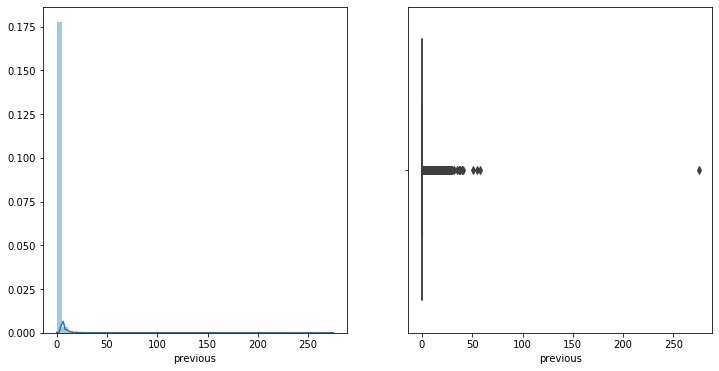

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(bank["previous"])
plt.subplot(1,2,2)
sns.boxplot(bank["previous"])
plt.show()

In [42]:
sum(bank.previous>30)

12

Let's drop all the rows with values more than 30 for `previous`.

In [43]:
bank.drop(bank[bank.previous>30].index,axis=0,inplace=True)

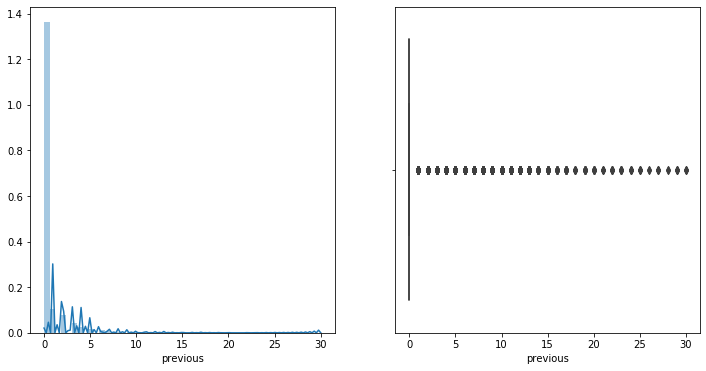

In [44]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(bank["previous"])
plt.subplot(1,2,2)
sns.boxplot(bank["previous"])
plt.show()

In [45]:
sum(bank.previous==0)

34703

Note that a large number of rows have `previous` as 0. It's better to drop this attribute for now.

In [46]:
bank.drop("previous",axis=1,inplace=True)

In [47]:
bank.shape

(42464, 12)

In [48]:
print("Rows deleted: {}".format(45211-bank.shape[0]))

Rows deleted: 2747


### <font style = "color:rgb(8,133,37)">Data Preparation</font>

Since we have already dealt with missing data and the data types, let's directly focus on embedding the data.

In [49]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,Target
0,58,management,married,tertiary,no,2143,yes,no,5,may,1,no
1,44,technician,single,secondary,no,29,yes,no,5,may,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1,no
5,35,management,married,tertiary,no,231,yes,no,5,may,1,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,1,no


In [50]:
bank.job.unique()

array(['management', 'technician', 'entrepreneur', 'retired', 'admin.',
       'services', 'blue-collar', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [51]:
# Perform one hot embedding and remove original job column
bank = pd.concat([bank,
                    pd.get_dummies(bank.job,drop_first=True)
                   ], axis=1).drop("job",axis=1)
bank.head()

,age,marital,education,default,balance,housing,loan,day,month,campaign,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,58,married,tertiary,no,2143,yes,no,5,may,1,...,0,0,0,1,0,0,0,0,0,0
1,44,single,secondary,no,29,yes,no,5,may,1,...,0,0,0,0,0,0,0,0,1,0
2,33,married,secondary,no,2,yes,yes,5,may,1,...,0,1,0,0,0,0,0,0,0,0
5,35,married,tertiary,no,231,yes,no,5,may,1,...,0,0,0,1,0,0,0,0,0,0
6,28,single,tertiary,no,447,yes,yes,5,may,1,...,0,0,0,1,0,0,0,0,0,0


In [52]:
bank.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [53]:
# Perform one hot embedding and remove original marital column
bank = pd.concat([bank,
                    pd.get_dummies(bank.marital,drop_first=True)
                   ], axis=1).drop("marital",axis=1)
bank.head()

,age,education,default,balance,housing,loan,day,month,campaign,Target,...,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,single
0,58,tertiary,no,2143,yes,no,5,may,1,no,...,0,1,0,0,0,0,0,0,1,0
1,44,secondary,no,29,yes,no,5,may,1,no,...,0,0,0,0,0,0,1,0,0,1
2,33,secondary,no,2,yes,yes,5,may,1,no,...,0,0,0,0,0,0,0,0,1,0
5,35,tertiary,no,231,yes,no,5,may,1,no,...,0,1,0,0,0,0,0,0,1,0
6,28,tertiary,no,447,yes,yes,5,may,1,no,...,0,1,0,0,0,0,0,0,0,1


In [54]:
bank.education.unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [55]:
# Perform one hot embedding and remove original education column
bank = pd.concat([bank,
                    pd.get_dummies(bank.education,drop_first=True)
                   ], axis=1).drop("education",axis=1)
bank.head()

,age,default,balance,housing,loan,day,month,campaign,Target,blue-collar,...,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary
0,58,no,2143,yes,no,5,may,1,no,0,...,0,0,0,0,0,0,1,0,0,1
1,44,no,29,yes,no,5,may,1,no,0,...,0,0,0,0,1,0,0,1,1,0
2,33,no,2,yes,yes,5,may,1,no,0,...,0,0,0,0,0,0,1,0,1,0
5,35,no,231,yes,no,5,may,1,no,0,...,0,0,0,0,0,0,1,0,0,1
6,28,no,447,yes,yes,5,may,1,no,0,...,0,0,0,0,0,0,0,1,0,1


In [56]:
bank.default.unique()

array(['no', 'yes'], dtype=object)

In [57]:
bank.default = bank.default.map({"yes":1,"no":0})

In [58]:
bank.head()

,age,default,balance,housing,loan,day,month,campaign,Target,blue-collar,...,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary
0,58,0,2143,yes,no,5,may,1,no,0,...,0,0,0,0,0,0,1,0,0,1
1,44,0,29,yes,no,5,may,1,no,0,...,0,0,0,0,1,0,0,1,1,0
2,33,0,2,yes,yes,5,may,1,no,0,...,0,0,0,0,0,0,1,0,1,0
5,35,0,231,yes,no,5,may,1,no,0,...,0,0,0,0,0,0,1,0,0,1
6,28,0,447,yes,yes,5,may,1,no,0,...,0,0,0,0,0,0,0,1,0,1


In [59]:
bank.housing.unique()

array(['yes', 'no'], dtype=object)

In [60]:
bank.housing = bank.housing.map({"yes":1,"no":0})

In [61]:
bank.head()

,age,default,balance,housing,loan,day,month,campaign,Target,blue-collar,...,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary
0,58,0,2143,1,no,5,may,1,no,0,...,0,0,0,0,0,0,1,0,0,1
1,44,0,29,1,no,5,may,1,no,0,...,0,0,0,0,1,0,0,1,1,0
2,33,0,2,1,yes,5,may,1,no,0,...,0,0,0,0,0,0,1,0,1,0
5,35,0,231,1,no,5,may,1,no,0,...,0,0,0,0,0,0,1,0,0,1
6,28,0,447,1,yes,5,may,1,no,0,...,0,0,0,0,0,0,0,1,0,1


In [62]:
bank.loan = bank.loan.map({"yes":1,"no":0})

In [63]:
bank.head()

,age,default,balance,housing,loan,day,month,campaign,Target,blue-collar,...,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary
0,58,0,2143,1,0,5,may,1,no,0,...,0,0,0,0,0,0,1,0,0,1
1,44,0,29,1,0,5,may,1,no,0,...,0,0,0,0,1,0,0,1,1,0
2,33,0,2,1,1,5,may,1,no,0,...,0,0,0,0,0,0,1,0,1,0
5,35,0,231,1,0,5,may,1,no,0,...,0,0,0,0,0,0,1,0,0,1
6,28,0,447,1,1,5,may,1,no,0,...,0,0,0,0,0,0,0,1,0,1


In [64]:
bank.Target = bank.Target.map({"yes":1,"no":0})

In [65]:
bank.head()

,age,default,balance,housing,loan,day,month,campaign,Target,blue-collar,...,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary
0,58,0,2143,1,0,5,may,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,44,0,29,1,0,5,may,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,33,0,2,1,1,5,may,1,0,0,...,0,0,0,0,0,0,1,0,1,0
5,35,0,231,1,0,5,may,1,0,0,...,0,0,0,0,0,0,1,0,0,1
6,28,0,447,1,1,5,may,1,0,0,...,0,0,0,0,0,0,0,1,0,1


Instead of applying one hot encoding to month, we can directly encode it to integers. But, for initial analysis, let's apply one hot encoding.

In [66]:
# Perform one hot embedding and remove original month column
bank = pd.concat([bank,
                    pd.get_dummies(bank.month,drop_first=True)
                   ], axis=1).drop("month",axis=1)
bank.head()

,age,default,balance,housing,loan,day,campaign,Target,blue-collar,entrepreneur,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,35,0,231,1,0,5,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,28,0,447,1,1,5,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [67]:
bank.shape

(42464, 33)

Finally, we are left with 42464 rows and 33 features.

Before we proceed with model building, let's normalize the attribute values.

In [68]:
bank_backup = bank.copy()

In [69]:
Y = bank.Target
bank.drop("Target",axis=1,inplace=True)

In [70]:
bank = (bank - bank.min()) / (bank.max() - bank.min())

In [71]:
bank["Target"] = Y

We are now ready for model building.

### <font style = "color:rgb(8,133,37)">Model Building</font>

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [73]:
X = bank.drop("Target",axis=1)
y = bank.Target 

In [74]:
# 30% of the data will be used for testing
test_size= 0.30
seed = 42
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=test_size, random_state=seed)

In [75]:
y_train.shape, y_test.shape

((29724,), (12740,))

There are 29.7K rows in training dataset and 12.7K rows in testing dataset.

For classification algorithms, let's start off with logistic regression, kNN, decision tree and gaussian naive bayes classifier.

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [77]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [78]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=seed)    
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "Train: %s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    # fit the model
    model.fit(X_train,y_train)
    # test the model
    predictions = model.predict(X_test)
    # accuracy score
    msg = "Test: %s: %f" % (name,accuracy_score(y_test, predictions))
    print(msg)
    # confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(cm)
    # classification report
    print(classification_report(y_test, predictions))

Train: LR: 0.884302 (0.005231)
Test: LR: 0.884615
[[11153   119]
 [ 1351   117]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11272
           1       0.50      0.08      0.14      1468

    accuracy                           0.88     12740
   macro avg       0.69      0.53      0.54     12740
weighted avg       0.85      0.88      0.85     12740

Train: KNN: 0.878650 (0.004175)
Test: KNN: 0.878493
[[10981   291]
 [ 1257   211]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     11272
           1       0.42      0.14      0.21      1468

    accuracy                           0.88     12740
   macro avg       0.66      0.56      0.57     12740
weighted avg       0.84      0.88      0.85     12740

Train: CART: 0.815200 (0.007050)
Test: CART: 0.822841
[[10098  1174]
 [ 1083   385]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.9

While the accuracy scores obtained for the test data and using KFold show that all the models perform quite well and that logistic regression performs the best, the classification report shows very low values for precision and recall for y = 1. This is common across all the models and is primarily because of unbalanced data. This can be fixed by upscaling the minority class (y=1).

In [79]:
from sklearn.utils import resample

In [80]:
bank.Target.value_counts()

0    37559
1     4905
Name: Target, dtype: int64

In [81]:
# Separate majority and minority classes
df_majority = bank[bank.Target==0]
df_minority = bank[bank.Target==1]

In [82]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=37559,    # to match majority class
                                 random_state=seed) # reproducible results

In [83]:
# Combine majority class with upsampled minority class
bank_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [84]:
# Display new class counts
bank_upsampled.Target.value_counts()

1    37559
0    37559
Name: Target, dtype: int64

In [85]:
X = bank_upsampled.drop("Target",axis=1)
y = bank_upsampled.Target

In [86]:
# 30% of the data will be used for testing
test_size= 0.30
seed = 42
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=test_size, random_state=seed)

In [87]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [88]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=seed)    
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "Train: %s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    # fit the model
    model.fit(X_train,y_train)
    # test the model
    predictions = model.predict(X_test)
    # accuracy score
    msg = "Test: %s: %f" % (name,accuracy_score(y_test, predictions))
    print(msg)
    # confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(cm)
    # classification report
    print(classification_report(y_test, predictions))

Train: LR: 0.663231 (0.004070)
Test: LR: 0.669684
[[8103 3212]
 [4232 6989]]
              precision    recall  f1-score   support

           0       0.66      0.72      0.69     11315
           1       0.69      0.62      0.65     11221

    accuracy                           0.67     22536
   macro avg       0.67      0.67      0.67     22536
weighted avg       0.67      0.67      0.67     22536

Train: KNN: 0.827432 (0.003217)
Test: KNN: 0.837638
[[ 8153  3162]
 [  497 10724]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.82     11315
           1       0.77      0.96      0.85     11221

    accuracy                           0.84     22536
   macro avg       0.86      0.84      0.84     22536
weighted avg       0.86      0.84      0.84     22536

Train: CART: 0.926401 (0.003759)
Test: CART: 0.931665
[[ 9816  1499]
 [   41 11180]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93   

There are 2 things to note above. Even though in most cases the accuracy score has reduced, there is significant improvement in precision and recall scores for class 1. Out of the 4 models we tried, kNN and decision trees provided the best results.

### <font style = "color:rgb(8,133,37)">Ensemble Techniques</font>

#### <font style = "color:rgb(8,133,37)">Random Forest</font>

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rf = RandomForestClassifier(n_estimators=10,random_state = seed)

In [91]:
scores = cross_val_score(rf, X_train, y_train, cv=5)

In [92]:
scores.mean(),scores.std()

(0.9581035763173, 0.003385948634433885)

Using random forest classifier, we are able to get a cross validation score of 0.9571

In [93]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [94]:
# test the model
predictions = rf.predict(X_test)
# accuracy score
msg = "Test: Random Forest: %f" % (accuracy_score(y_test, predictions))
print(msg)
# confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)
# classification report
print(classification_report(y_test, predictions))

Test: Random Forest: 0.967519
[[10654   661]
 [   71 11150]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97     11315
           1       0.94      0.99      0.97     11221

    accuracy                           0.97     22536
   macro avg       0.97      0.97      0.97     22536
weighted avg       0.97      0.97      0.97     22536



Note how random forest classifier was able to obtain high test accuracy and high precision and recall for both classes as well.

#### <font style = "color:rgb(8,133,37)">AdaBoost Classifier</font>

In [95]:
from sklearn.ensemble import AdaBoostClassifier

In [96]:
clf = AdaBoostClassifier(n_estimators=100,random_state=seed)

In [97]:
scores = cross_val_score(clf, X_train, y_train, cv=5)

In [98]:
scores.mean(),scores.std()

(0.6793387665127792, 0.002941049135716967)

As we can see here, AdaBoost classifier was not able to obtain high accuracy. One of the reasons behind this can be that it's made of decision stumps by default, instead of decision trees like random forest.

In [99]:
clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)

In [100]:
# test the model
predictions = clf.predict(X_test)
# accuracy score
msg = "Test: AdaBoost Classifier: %f" % (accuracy_score(y_test, predictions))
print(msg)
# confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)
# classification report
print(classification_report(y_test, predictions))

Test: AdaBoost Classifier: 0.683617
[[8416 2899]
 [4231 6990]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70     11315
           1       0.71      0.62      0.66     11221

    accuracy                           0.68     22536
   macro avg       0.69      0.68      0.68     22536
weighted avg       0.69      0.68      0.68     22536



Even though the accuracy score obtained was not high, the precision, recall and f1-score were around 0.6 to 0.7, which is not bad.

#### <font style = "color:rgb(8,133,37)">Gradient Boosting Classifier</font>

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

In [102]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=seed)

In [103]:
scores = cross_val_score(clf, X_train, y_train, cv=5)

In [104]:
scores.mean(),scores.std()

(0.6818870723523378, 0.004003411253786577)

Similar to AdaBoost classifier, gradient boosting classifier was not able to obtain high accuracy.

In [105]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [106]:
# test the model
predictions = clf.predict(X_test)
# accuracy score
msg = "Test: Gradient Boosting Classifier: %f" % (accuracy_score(y_test, predictions))
print(msg)
# confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)
# classification report
print(classification_report(y_test, predictions))

Test: Gradient Boosting Classifier: 0.687167
[[8470 2845]
 [4205 7016]]
              precision    recall  f1-score   support

           0       0.67      0.75      0.71     11315
           1       0.71      0.63      0.67     11221

    accuracy                           0.69     22536
   macro avg       0.69      0.69      0.69     22536
weighted avg       0.69      0.69      0.69     22536



Similar to AdaBoost classifier, the accuracy score is not high but all precision, recall and f1-score lie in the range of 0.6-0.75

### <font style = "color:rgb(8,133,37)">Model Comparison</font>

Among all the models considered, kNN, Decision Tree and Random Forest were able to obtain high accuracy scores. Of the 3, as expected, random forest gave the highest accuracy score. On the other hand, other ensembles like gradient boosting classifier and AdaBoost classifier didn't provide any better score as compared to other classifiers like Logistic Regression and Naive Bayes.

Comparing the difference between accuracy scores for Decision Tree and Random Forest, it can be clearly observed that the ensemble technique outperforms the Decision Tree classifier. Moreover, since we didn't provide any specific parameters in Decision Tree to prevent it from overfitting, it is not as good a general model as random forest classifier will be, since it's not prone to overfitting.